In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']


df.head(100)

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [3]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values



In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  #initialize standardscaler
X_std =  scaler.fit_transform(X)  #fit transform


transpose = X_std.T  #transpose
transpose_df = pd.DataFrame(data=transpose)   #transpose dataframe
cov_mat = np.cov(transpose)

cov_mat


array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

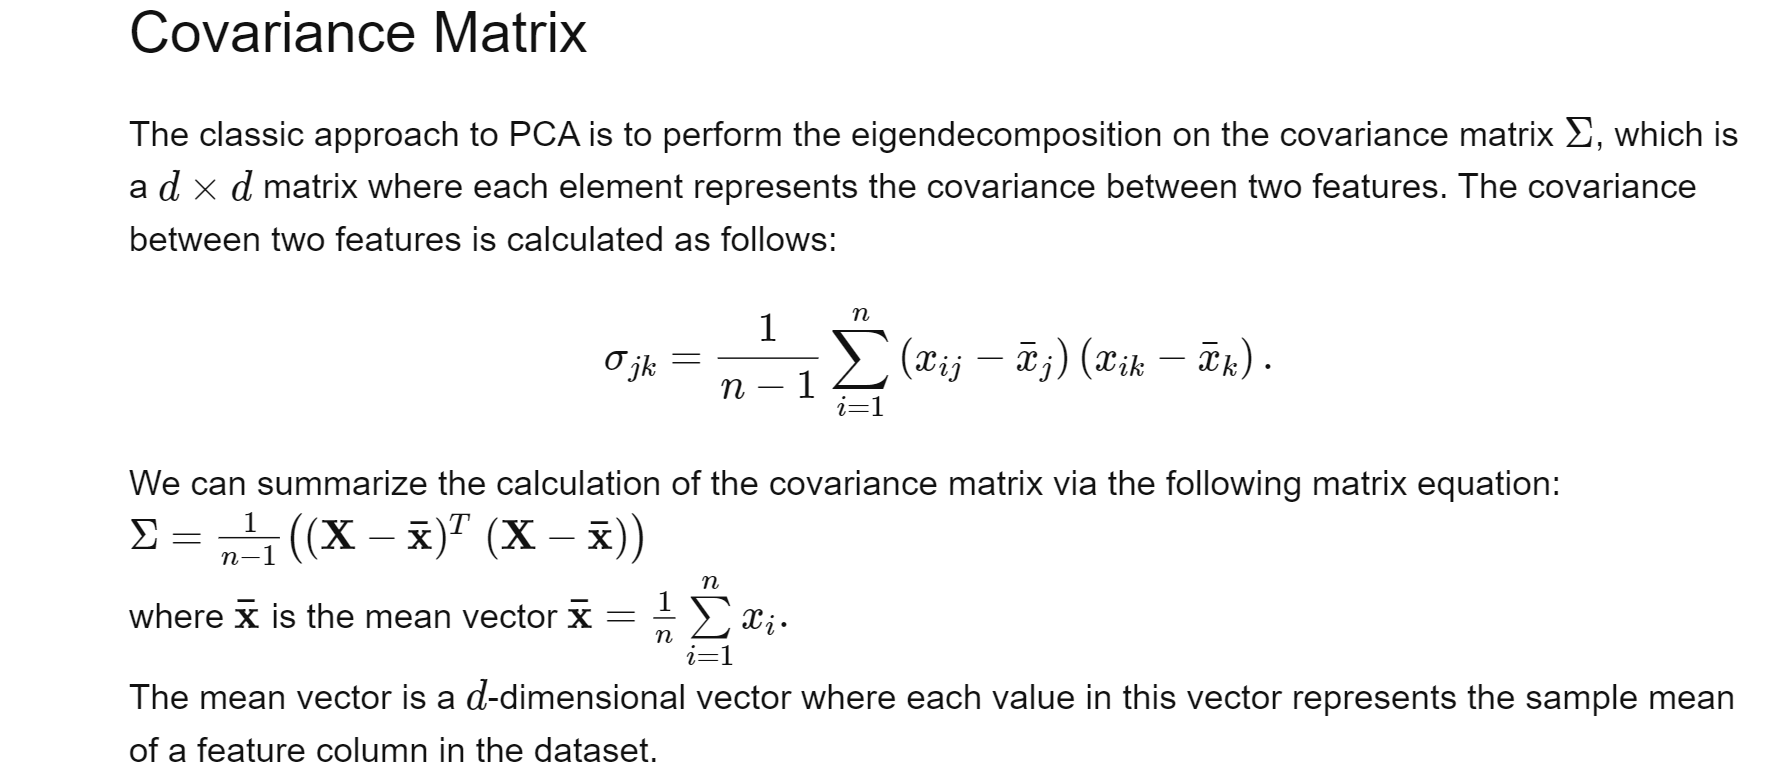

In [5]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)   #get eigen_values and eigen_vectors

print('Eigenvectors \n' , eig_vecs)
print('\nEigenvalues \n' ,eig_vals)


Eigenvectors 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
 [2.93035378 0.92740362 0.14834223 0.02074601]


# Selecting Principal Components

In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigenvectors.

In [6]:



eig_pairs1 = dict(zip(eig_vals , eig_vecs))   # zipping two variables and converting to dictionary   





eigen_array = list(eig_pairs1.items())   #converting to list
eigen_array = np.array(eigen_array) #converting to array

print(eigen_array)

[[2.9303537755893183
  array([ 0.52237162, -0.37231836, -0.72101681,  0.26199559])]
 [0.9274036215173421
  array([-0.26335492, -0.92555649,  0.24203288, -0.12413481])]
 [0.14834222648163972
  array([ 0.58125401, -0.02109478,  0.14089226, -0.80115427])]
 [0.020746013995596023
  array([ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627])]]


Explained Variance


After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components

In [7]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

In [8]:
var_exp

[72.77045209380135, 23.030523267680643, 3.6838319576273837, 0.5151926808906342]

Text(0.5, 0, 'Principal components')

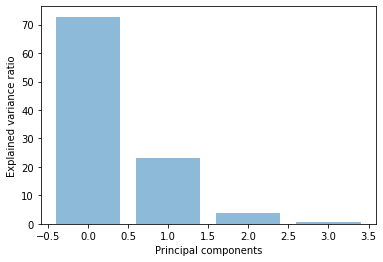

In [9]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))

plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')

plt.ylabel('Explained variance ratio')

plt.xlabel('Principal components')

Projection Matrix

The construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. Although, the name "projection matrix" has a nice ring to it, it is basically just a matrix of our concatenated top k eigenvectors.

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W.

In [13]:
matrix_w = np.hstack((eigen_array[0][1].reshape(4,1), 
                      eigen_array[1][1].reshape(4, 1)))

print('Matrix W:\n', matrix_w)


print("*"*20)
print(eigen_array[0][1])
print(eigen_array[1][1])
#eig_pairs[1][1]
#eig_pairs


#matrix_w.shape

Matrix W:
 [[ 0.52237162 -0.26335492]
 [-0.37231836 -0.92555649]
 [-0.72101681  0.24203288]
 [ 0.26199559 -0.12413481]]
********************
[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
[-0.26335492 -0.92555649  0.24203288 -0.12413481]


Projection Onto the New Feature Space

In this last step we will use the 4×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation
Y=X×W, where Y is a 150×2 matrix of our transformed samples.

In [15]:
Y = X_std.dot(matrix_w)


princi_df = pd.DataFrame(data=Y, columns=['principal_component1', 'principal_component2'])
princi_df

,principal_component1,principal_component2
0,-0.231658,-0.879674
1,0.072530,0.255029
2,-0.185369,-0.123268
3,-0.244510,0.150346
4,-0.381109,-1.061941
...,...,...
145,0.377143,-0.139074
146,0.498963,1.097204
147,0.147218,-0.026293
148,-0.365955,-0.808703


<AxesSubplot:xlabel='principal_component1', ylabel='principal_component2'>

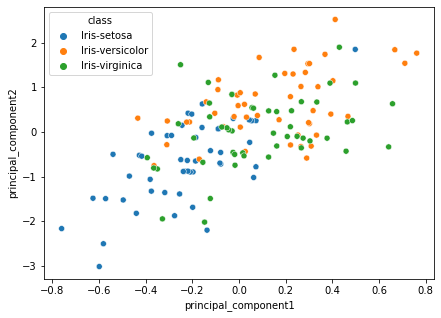

In [16]:
import seaborn as sns


plt.figure(figsize=(7, 5))

sns.scatterplot(princi_df.principal_component1 , princi_df.principal_component2 , hue=df['class'])